Prepare Heart rate data up to the point of applying a machine learning algorithm.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
import math
# Normalize input dataset before implementing logistic regression: 
from scipy.stats import zscore

In [15]:
HR_26154 = pd.read_csv('26154_HR_.csv')
HR_26154

,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT
0,1061969481,3,26154,1,NaN,80,2023-01-20 13:47:00,2023-01-20 13:48:00
1,1061973375,3,26154,1,NaN,80,2023-01-20 13:48:00,2023-01-20 13:49:00
2,1061973376,3,26154,1,NaN,97,2023-01-20 13:49:00,2023-01-20 13:50:00
3,1061973377,3,26154,1,NaN,96,2023-01-20 13:50:00,2023-01-20 13:51:00
4,1061973378,3,26154,1,NaN,70,2023-01-20 14:11:00,2023-01-20 14:12:00
...,...,...,...,...,...,...,...,...
253225,1133220357,3,26154,1,NaN,93,2023-08-31 21:04:00,2023-08-31 21:05:00
253226,1133220358,3,26154,1,NaN,95,2023-08-31 21:05:00,2023-08-31 21:06:00
253227,1133220359,3,26154,1,NaN,124,2023-08-31 21:32:00,2023-08-31 21:33:00
253228,1133220759,3,26154,1,NaN,96,2023-09-01 10:24:00,2023-09-01 10:25:00


In [16]:
np.size(HR_26154.STUDY_METRIC_MSR_START_DT.unique())

224106

In [17]:
HR_26154.STUDY_METRIC_MSR_START_DT.value_counts()

STUDY_METRIC_MSR_START_DT
2023-03-14 13:41:00    2
2023-04-05 11:45:00    2
2023-04-05 12:00:00    2
2023-04-05 11:56:00    2
2023-04-05 11:55:00    2
                      ..
2023-04-12 04:18:00    1
2023-04-12 04:19:00    1
2023-04-12 04:20:00    1
2023-04-12 04:21:00    1
2023-09-01 10:25:00    1
Name: count, Length: 224106, dtype: int64

In [18]:
# HR_2_times = pd.DataFrame(columns=HR_26154.columns)
# i = 0
# for val, cnt in HR_26154.STUDY_METRIC_MSR_START_DT.value_counts().items():
#     if (cnt == 2):
#         HR_2_times = pd.concat([HR_2_times, HR_26154[HR_26154['STUDY_METRIC_MSR_START_DT']== val]],ignore_index=True)
#         i = i + 1
#         print('value', val, 'was found', cnt, 'times', i)

In [19]:
abcd = HR_26154.STUDY_METRIC_MSR_START_DT.value_counts()
abcd

STUDY_METRIC_MSR_START_DT
2023-03-14 13:41:00    2
2023-04-05 11:45:00    2
2023-04-05 12:00:00    2
2023-04-05 11:56:00    2
2023-04-05 11:55:00    2
                      ..
2023-04-12 04:18:00    1
2023-04-12 04:19:00    1
2023-04-12 04:20:00    1
2023-04-12 04:21:00    1
2023-09-01 10:25:00    1
Name: count, Length: 224106, dtype: int64

In [20]:
np.sum(abcd.values == 2)

29124

In [21]:
# HR_2_times.head(100)

Let us just drop the duplicate values for now, and move on to next stage.

In [22]:
np.size(HR_26154.STUDY_METRIC_MSR_START_DT.unique())

224106

In [23]:
HR_26154.drop_duplicates(subset="STUDY_METRIC_MSR_START_DT",keep="first", inplace = True)
HR_26154

,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT
0,1061969481,3,26154,1,NaN,80,2023-01-20 13:47:00,2023-01-20 13:48:00
1,1061973375,3,26154,1,NaN,80,2023-01-20 13:48:00,2023-01-20 13:49:00
2,1061973376,3,26154,1,NaN,97,2023-01-20 13:49:00,2023-01-20 13:50:00
3,1061973377,3,26154,1,NaN,96,2023-01-20 13:50:00,2023-01-20 13:51:00
4,1061973378,3,26154,1,NaN,70,2023-01-20 14:11:00,2023-01-20 14:12:00
...,...,...,...,...,...,...,...,...
253225,1133220357,3,26154,1,NaN,93,2023-08-31 21:04:00,2023-08-31 21:05:00
253226,1133220358,3,26154,1,NaN,95,2023-08-31 21:05:00,2023-08-31 21:06:00
253227,1133220359,3,26154,1,NaN,124,2023-08-31 21:32:00,2023-08-31 21:33:00
253228,1133220759,3,26154,1,NaN,96,2023-09-01 10:24:00,2023-09-01 10:25:00


In [24]:
HR_26154.STUDY_METRIC_MSR_START_DT.value_counts()

STUDY_METRIC_MSR_START_DT
2023-01-20 13:47:00    1
2023-06-13 20:13:00    1
2023-06-13 20:02:00    1
2023-06-13 20:03:00    1
2023-06-13 20:04:00    1
                      ..
2023-03-22 02:32:00    1
2023-03-22 02:33:00    1
2023-03-22 02:34:00    1
2023-03-22 02:35:00    1
2023-09-01 10:25:00    1
Name: count, Length: 224106, dtype: int64

In [25]:
# HR_26154.info()

In [26]:
HR_26154['STUDY_METRIC_MSR_START_DT'] = pd.to_datetime(HR_26154['STUDY_METRIC_MSR_START_DT'])
HR_26154['STUDY_METRIC_MSR_END_DT'] = pd.to_datetime(HR_26154['STUDY_METRIC_MSR_END_DT'])
# HR_26154.info()

Let us pick a day and plot both heart rate and steps measurement on that entire day for that person. Missing values will be just omitted. 

May be save the spreadsheets in dropbox and ask everyone. 

I might be able to do clustering and see that total number of clusters for number of steps per minute should be equal to different types of steps, like sedentary, a active, fairly active etc. 

In [27]:
HR_26154.STUDY_METRIC_MSR_START_DT.max() -  HR_26154.STUDY_METRIC_MSR_START_DT.min()

Timedelta('223 days 20:38:00')

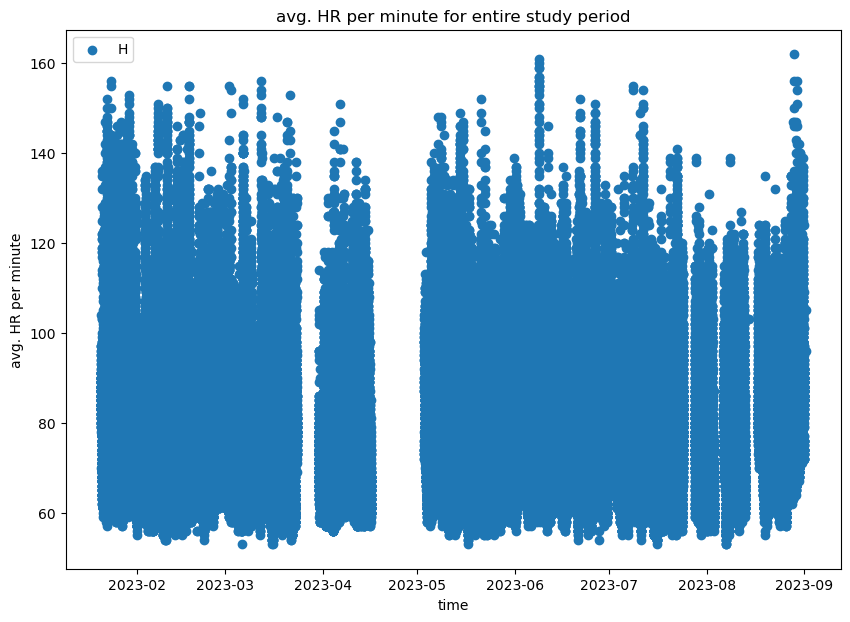

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(HR_26154['STUDY_METRIC_MSR_START_DT'], HR_26154['STUDY_METRIC_MSR_VAL']) 
plt.title('avg. HR per minute for entire study period')
plt.xlabel('time')
plt.ylabel('avg. HR per minute')
plt.legend('HR')
plt.show()


Select start and end time for plot.

In [29]:
mask = (HR_26154['STUDY_METRIC_MSR_START_DT'].dt.time >= pd.to_datetime('6:00:00').time()) & (HR_26154['STUDY_METRIC_MSR_START_DT'].dt.time <= pd.to_datetime('8:59:00').time())
mask
HRdata_t1_t2 = HR_26154[mask] 
HRdata_t1_t2



,STUDY_METRIC_ID,STUDY_METRIC_TYP_ID,PRTCPT_DVC_ID,PRTCPT_DVC_TYP_ID,STUDY_METRIC_PRTCPTN_IND,STUDY_METRIC_MSR_VAL,STUDY_METRIC_MSR_START_DT,STUDY_METRIC_MSR_END_DT
943,1062249022,3,26154,1,NaN,83,2023-01-21 06:09:00,2023-01-21 06:10:00
944,1062249023,3,26154,1,NaN,94,2023-01-21 06:10:00,2023-01-21 06:11:00
945,1062249024,3,26154,1,NaN,112,2023-01-21 06:11:00,2023-01-21 06:12:00
946,1062249025,3,26154,1,NaN,116,2023-01-21 06:12:00,2023-01-21 06:13:00
947,1062249026,3,26154,1,NaN,110,2023-01-21 06:13:00,2023-01-21 06:14:00
...,...,...,...,...,...,...,...,...
252496,1133218995,3,26154,1,NaN,98,2023-08-31 08:55:00,2023-08-31 08:56:00
252497,1133218996,3,26154,1,NaN,95,2023-08-31 08:56:00,2023-08-31 08:57:00
252498,1133218997,3,26154,1,NaN,96,2023-08-31 08:57:00,2023-08-31 08:58:00
252499,1133218998,3,26154,1,NaN,92,2023-08-31 08:58:00,2023-08-31 08:59:00


Plot average 24 hour heart rate of this person taken over the entire time. 

In [30]:
# Do it on the dropped overall aggregated value over entire day. 
# steps_unique_aggregated 

In [31]:
# !pip install bokeh

In [32]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import HoverTool
import random

# Create a figure object.
p = figure(title = "Simple Scatter Plot in Bokeh", x_axis_label='X-Axis', y_axis_label='Y-Axis')

# Specify the output HTML file where the output will be shown.
output_file("scatter.html")

# Generate some random data.
x = [random.randint(1, 10) for _ in range(500)]
y = [random.randint(1, 10) for _ in range(500)]

# Create a scatter plot.
p.circle(x, y, size = 10, color = "navy", alpha = 0.5)

# Add a hover tool to display the value of a particular point when you hover over it.
p.add_tools(HoverTool())

# Display the plot by calling the show() function.
show(p)

DO THE HEXPLOT OR KNN OF HR VS STEPS, OR SOMETHING LIKE THAT.